# Loan Application Status Prediction
# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

# Loan Approval Prediction:
EDA + Decision Tree, Random Forest & Logistic Regression Modeling

In [59]:
################### Importing Libraries ######################
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
%matplotlib inline
train_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Observations: 

We can see there are total 13 columns including target variable, all of them are self explanatory.

We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

In [4]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Mapping the target variable with Y: 1 and N: 0.

In [5]:
train_df['Loan_Status'] = train_df['Loan_Status'].map({ 'N' : 0, 'Y' : 1})

Using mode to fill the nulls of the Married and Gender column.

In [8]:
train_df['Married'].fillna(train_df['Married'].value_counts().index[0], inplace=True)
train_df['Gender'].fillna(train_df['Gender'].value_counts().index[0], inplace=True)

Dependents: If Loan Status is ‘1’, dependent = 2, else 1. For testing data, if Credit_History = 1, dependent = 2, else 1.

In [9]:
# If loan status is 1 then, dependent = 2 else dependent=1
train_df.loc[(train_df.Dependents.isnull())&(train_df.Loan_Status==1),'Dependents'] = '2'
train_df.loc[(train_df.Dependents.isnull()),'Dependents'] = '1'


Credit_History: If Loan Status is ‘1’, Credit_History = 1, else 0. For testing data, imputing with the mode is a good choice.

In [10]:
# If loan status is 1 then, Credit_History = 1 else Credit_History=0
train_df.loc[(train_df.Credit_History.isnull())&(train_df.Loan_Status==1),'Credit_History'] = 1
train_df.loc[(train_df.Credit_History.isnull()),'Credit_History'] = 0

# Fill Null values with mode of Credit_History column for test
train_df['Credit_History'].fillna(train_df['Credit_History'].value_counts().index[0], inplace=True)
#In test data, for the user with income = 2733, it was decided to impute credit history as 0 based upon the Income to loan ratio 
train_df.loc[(train_df.ApplicantIncome == 2733),'Credit_History']  = 0


Self_Employed: If Credit_History is ‘1’, imputing Self_Employed = No.

In [11]:
# If Credit_History is 1 then, impute Self_Employed = No else Yes
train_df.loc[(train_df.Self_Employed.isnull())&(train_df.Credit_History==1),'Self_Employed'] ='No'
train_df.loc[(train_df.Self_Employed.isnull()),'Self_Employed'] = 'Yes'


Loan_Amount_Term, LoanAmount: Imputing the features’ null with a median of the other columns(Gender, Married, Education, Self_Employed, Dependents) grouped.


In [17]:
#get the index of the null columns for Loan_Amount_Term - train
index_NaN_Loan_Amount_Term = list(train_df["Loan_Amount_Term"][train_df["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = train_df["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_pred = train_df["Loan_Amount_Term"][((train_df['Gender'] == train_df.iloc[i]["Gender"]) & (train_df['Married'] == train_df.iloc[i]["Married"]) & (train_df['Education'] == train_df.iloc[i]["Education"]) & (train_df['Self_Employed'] == train_df.iloc[i]["Self_Employed"]) & (train_df['Dependents'] == train_df.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        train_df['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        train_df['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med
        

In [18]:
#get the index of the null columns for Loan_Amount_Term - train
index_NaN_Loan_Amount_Term = list(train_df["Loan_Amount_Term"][train_df["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = train_df["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_pred = train_df["Loan_Amount_Term"][((train_df['Gender'] == train_df.iloc[i]["Gender"]) & (train_df['Married'] == train_df.iloc[i]["Married"]) & (train_df['Education'] == train_df.iloc[i]["Education"]) & (train_df['Self_Employed'] == train_df.iloc[i]["Self_Employed"]) & (train_df['Dependents'] == train_df.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        train_df['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        train_df['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med


In [20]:

#Impute LoanAmount for train
index_NaN_LoanAmount = list(train_df["LoanAmount"][train_df["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = train_df["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_pred = train_df["LoanAmount"][((train_df['Property_Area'] == train_df.iloc[i]["Property_Area"]) & (train_df['Gender'] == train_df.iloc[i]["Gender"]) & (train_df['Married'] == train_df.iloc[i]["Married"]) & (train_df['Education'] == train_df.iloc[i]["Education"]) & (train_df['Self_Employed'] == train_df.iloc[i]["Self_Employed"]) & (train_df['Dependents'] == train_df.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        train_df['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        train_df['LoanAmount'].iloc[i] = LoanAmount_med

Introducing a new feature as Total_Income = ApplicantIncome + CoapplicantIncome as a feature engineering measure to optimize feature importance.


In [21]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']


As observed from inferences drawn from visualizations, for outlier treatment of Total_Amount and LoanAmount we use the log transformation method. Due to these outliers, the bulk of the data is at the left with a long right tail. This is called right skewness and log transformation is a good means to remove outliers. The log transformation doesn’t affect smaller instances rather reduces larger values to get a normal distribution.

In [22]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])
train_df['Total_Income_log'] = np.log(train_df['Total_Income'])

One hot encoding the categorical variables ‘Gender’, ‘Married’, ‘Self_Employed’, ‘Education’.


In [23]:
cat_col = ['Gender', 'Married', 'Self_Employed', 'Education']
for column in cat_col:
    train1 = pd.get_dummies(train_df, columns = cat_col)

Label encoding the left out features through mapping with respected values.


In [24]:
train1["Dependents"] = train1["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

train1["Property_Area"] = train1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

Deleting unwanted column entries not required during modeling.

In [26]:
del train_df['Loan_ID']
del train1['ApplicantIncome']
del train1['CoapplicantIncome']
del train1['LoanAmount']
del train1['Total_Income']

Note- These imputation techniques adopted by me were based on my hypothesis generated keeping in mind the necessary factors that affect approval status(i.e. Target Variable). There may be many other techniques possible. Nonetheless, these preprocessing steps proved fruitful in achieving a decent accuracy score of my model.

In [28]:
############ Count number of Categorical and Numerical Columns ######################
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


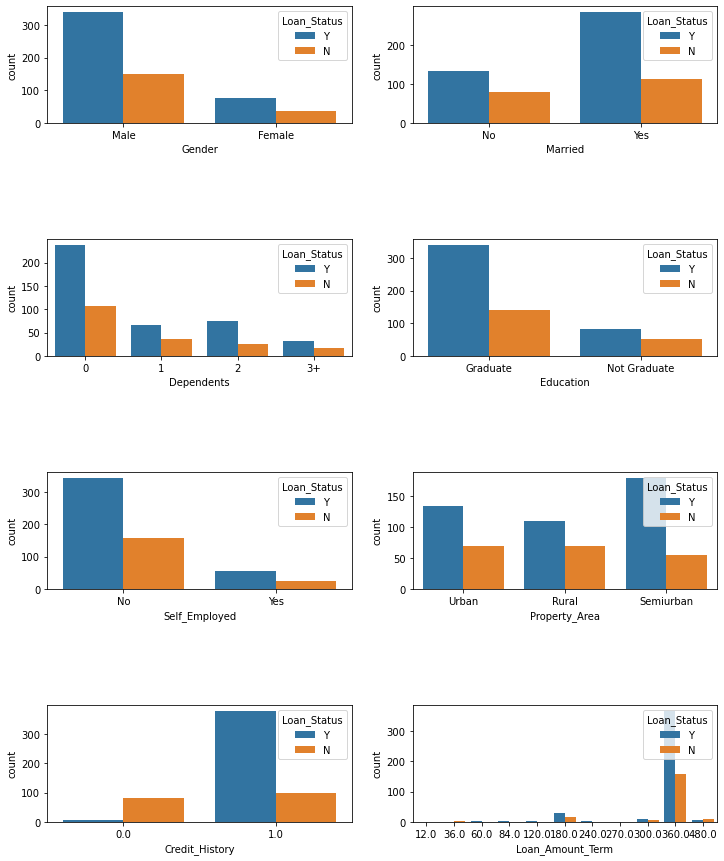

In [29]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Now, let's also analyze Numerical Columns:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  145.578990
std        6109.041673        2926.248369   84.263322
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  127.500000
75%        5795.000000        2297.250000  165.000000
max       81000.000000       41667.000000  700.000000


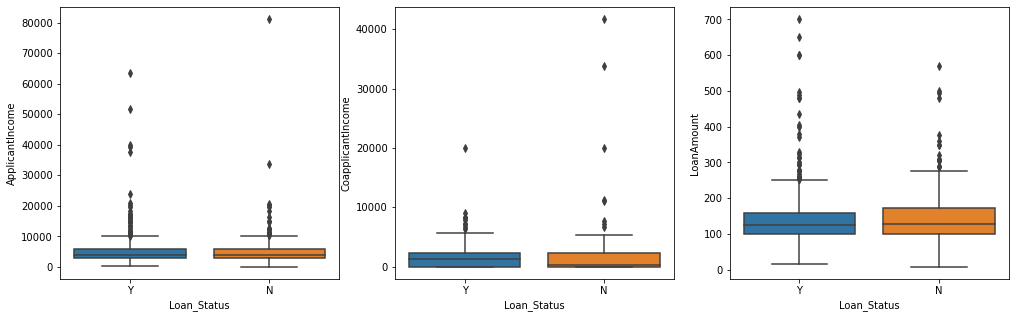

In [30]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# Preprocessing Data:
    
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

Encoding Categorical Features.
Imputing missing values

In [31]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_log,Total_Income_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,105.0,360.0,1.0,5849.0,4.653960,8.674026,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,6091.0,4.852030,8.714568,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,3000.0,4.189655,8.006368,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,4941.0,4.787492,8.505323,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,6000.0,4.948760,8.699515,1,0,0,0,0,0,0,0,1,1


# Step 3: Modelling and Results

For effective classification of the target variable, I have employed three efficacious algorithms Decision Tree Classifier, Random Forest Classifier,Logistic Regression models are fitted with relevant data with prior hyperparameter tuning of the models using Grid Search Cross-validation for optimized parameters needed for classification.
The initial step involves splitting the training dataset into train and validation sets in the proportion of 80:20. The validation set is important for analyzing results on completely unseen data.

In [32]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


Model 1: Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6413623312184024
Validation Mean Accuracy:  0.6719645433931148


Overfitting Problem

We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

First let's try tuning 'Max_Depth' of tree

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

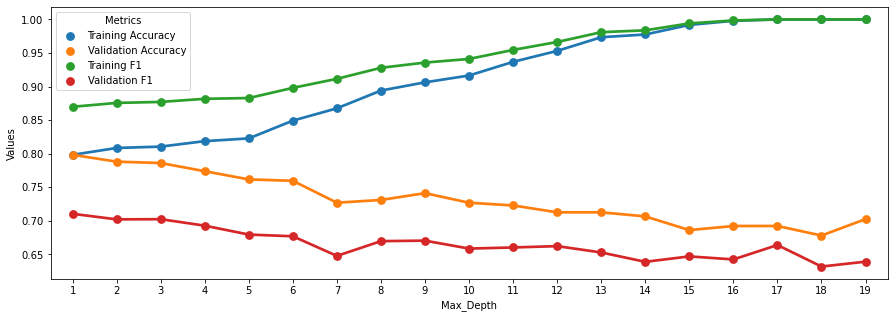

In [34]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

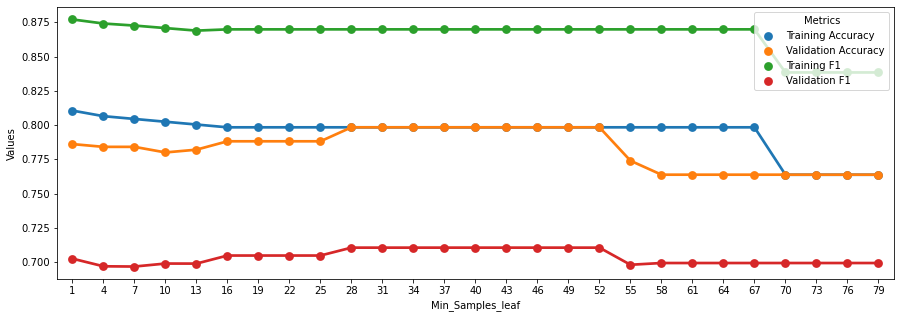

In [35]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)


From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Mis-classifications
It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

Let's look into Random Forest Classifier if it can reduce mis-classifications

Model 2: Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.7105036634489533
Validation Mean Accuracy:  0.7963306534735105


Random Forest: Test Data Evaluation

In [38]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


Random Forest gives same results as Decision Tree Classifier. Finally, we will try Logistic Regression Model by sweeping threshold values.

Model 3: Logistic Regression

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

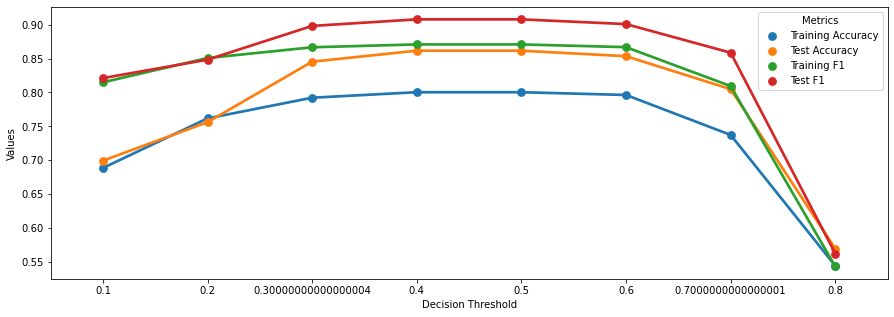

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Logistic Regression does slightly better than Decision Tree and Random Forest.
Based on the above Test/Train curves, we can keep threshold to 0.4.
Now Finally let's look at Logistic Regression Confusion Matrix

In [40]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier. In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of 86 %

In [41]:
# logistic regression
model1 = LogisticRegression()
# RandomForestClassifier
model2 = RandomForestClassifier()

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test_imp)
pred_prob2 = model2.predict_proba(X_test_imp)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values:

In [42]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

The AUC score can be computed using the roc_auc_score() method of sklearn:

In [43]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8213622291021672 0.8608359133126936


We can also plot the ROC curves for the two algorithms using matplotlib

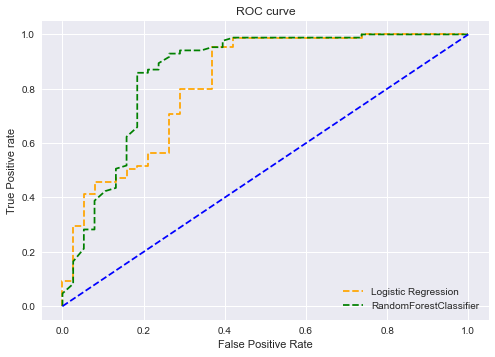

In [44]:
#AUC-ROC
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [45]:
# Finding best hyperparameters using Grid Search method for Random Forest to function

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.5min finished


In [ ]:
rfc = RandomForestClassifier(random_state = , max_depth = , n_estimators = , min_samples_split = , min_samples_leaf = )                                  
modelr = rfc.fit(X_train, y_train)
y_pred = modelr.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100 )

In [ ]:
import joblib
joblib.dump(rfc,"project.pkl")